Group 60,MD ZAMAN,14106583

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
cd /content/drive/MyDrive/Prog2T

/content/drive/MyDrive/Prog2T


## Objective:
Predict the stock price of an aerospace company using a regressor 

### Data Source

The dataset is found from https://www.openml.org/search?type=data&status=active&id=223

The dataset has daily stock prices from January 1988 through October 1991, for ten aerospace companies.


### Description of the dataset
The dataset has 950 cases.
Each case has stock prices of 10 companies.
Each case is identified by a unique id number 

The dataset has 10 continuous attributes which are stock prices of 10 companies.

Company10 is the target attribute or variable.

Stock price of company10 needs to be predicted based on the stock prices of the other nine companies

In [40]:
import pandas as pd

In [41]:
#Read csv file containing the dataset and name the columns
df = pd.read_csv('data/stock_data.csv',names = ['id','company1','company2','company3','company4','company5','company6','company7','company8','company9','company10'] )

In [42]:
#Show first 10 cases
df.head(10)

,id,company1,company2,company3,company4,company5,company6,company7,company8,company9,company10
0,1,17.219,50.500,18.750,43.000,60.875,26.375,67.750,19.000,48.750,34.875
1,2,17.891,51.375,19.625,44.000,62.000,26.125,68.125,19.125,48.750,35.625
2,3,18.438,50.875,19.875,43.875,61.875,27.250,68.500,18.250,49.000,36.375
3,4,18.672,51.500,20.000,44.000,62.625,27.875,69.375,18.375,49.625,36.250
4,5,17.438,49.000,20.000,41.375,59.750,25.875,63.250,16.500,47.500,35.500
5,6,18.109,49.000,19.500,41.875,59.625,26.625,66.250,17.125,47.750,34.375
6,7,18.563,49.375,19.125,42.500,60.750,27.250,65.750,16.875,47.875,34.000
7,8,18.672,50.125,19.250,43.000,61.750,28.000,66.000,16.875,47.250,34.625
8,9,18.563,49.750,19.000,43.250,61.750,29.000,65.750,17.125,47.000,34.875
9,10,19.063,50.500,19.125,43.875,61.875,29.625,66.875,17.750,47.375,36.000


It is visible that id number has no relationship with stock price of company10(target attribute).

Delete ID column

In [43]:
#Drop ID column.
#axis=1 so that whole column is dropped
df = df.drop(['id'], axis=1)


Allocate data and label.
Stock prices of company10 should be set as label and stock prices of the other nine companies should be set as data

In [44]:
#Set first 9 columns as data
data=df.iloc[:,0:9]
#Set last column as label
label=df.iloc[:,-1]
#print data
print(data)
#print label 
print(label)

     company1  company2  company3  company4  company5  company6  company7  \
0      17.219    50.500    18.750    43.000    60.875    26.375    67.750   
1      17.891    51.375    19.625    44.000    62.000    26.125    68.125   
2      18.438    50.875    19.875    43.875    61.875    27.250    68.500   
3      18.672    51.500    20.000    44.000    62.625    27.875    69.375   
4      17.438    49.000    20.000    41.375    59.750    25.875    63.250   
..        ...       ...       ...       ...       ...       ...       ...   
945    50.375    46.250    19.375    52.250    61.875    23.500    78.625   
946    50.750    46.375    19.625    50.875    64.625    23.250    77.625   
947    50.625    46.625    19.625    50.875    64.625    23.250    75.000   
948    50.125    47.000    19.875    50.750    62.750    22.875    74.500   
949    49.000    47.000    19.500    49.500    60.875    22.750    75.625   

     company8  company9  
0      19.000    48.750  
1      19.125    48.750

### Split dataset for training and testing

Split the dataset into four lists which are train_data,train_label,test_data_test_label where label represents the target attribute.

Assign 25% of the dataset for testing and the rest for training.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Use train_test_split() to split the dataset for training and testing.
# Set test_size to 0.25 to assign 25% of the dataset for testing 
# random_state to 42 to manage the amount of shuffling of the data before splitting
train_data, test_data, train_label, test_label = train_test_split(data,label, test_size = 0.25, random_state = 42)

In [47]:
# print the first 5 instances of test_Data 
print(test_data[:5])

     company1  company2  company3  company4  company5  company6  company7  \
199    28.891    50.750    22.250    42.750    73.250    32.875    72.250   
929    52.125    42.125    19.125    53.125    57.750    27.375    81.250   
693    41.625    23.625    14.625    37.375    46.500    15.500    67.750   
798    48.250    25.000    14.500    46.375    40.375    25.750    75.500   
874    49.500    40.000    17.750    56.500    53.750    25.750    82.125   

     company8  company9  
199    21.500    45.875  
929    26.375    43.250  
693    24.375    36.875  
798    27.125    40.500  
874    26.875    41.000  


### Assign four futureSample dataset
Assign four cases from the test dataset as the future dataset.
These 4 cases will act as real world imputs when the model is deployed

Create futureSample_data and futureSample_label lists with the last four instances of the training set 

In [48]:
futureSample_data= test_data[-4:]
futureSample_label= test_label[-4:]


Remove last four instances from the training set

In [49]:
data_test = test_data[:-4]
label_test = test_label[:-4]

###Only for experimental purposes
Experiment to choose which model works the best

In [ ]:
# Create different models for evaluation 
model_option = int(input("Select model for evaluation from the following: 1-Support vector regression, 2- linear regression, 3- K nearest neighbours and 4-decision tree \n your choice: "))
if (model_option == 1):
    # From sklearn.svm import SVR
    from sklearn.svm import SVR
    # Create SVC object by calling the SVC() constructor.  Set gamma = 'auto'.
    model = SVR(gamma='auto')
    # Train model using training dataset. 
    model.fit(train_data, train_label)
elif (model_option == 2):
    # From sklearn.linear_model import LinearRegression .
    from sklearn.linear_model import LinearRegression
    # Create linear regression object by calling the LinearRegression() constructor.
    model = LinearRegression()
    # Use training dataset to train the model. 
    model.fit(train_data, train_label)
elif (model_option == 3):
    # From sklearn.neighbors Import KNeighborsRegressor .
    from sklearn.neighbors import KNeighborsRegressor
    # Create KNN Regressor by calling the constructor KNeighborsRegressor().
    model = KNeighborsRegressor(n_neighbors=3)
    # Use training dataset to train the model.
    model.fit(train_data, train_label)
elif (model_option == 4):
    # From sklearn.tree import DecisionTreeRegressor .
    from sklearn.tree import DecisionTreeRegressor 
    # Create decision tree regressor by calling the constructor DecisionTreeRegressor(). 
    model = DecisionTreeRegressor()
    # Use training dataset to train the model.
    model.fit(train_data, train_label)
else: print("invalid option number. Try again")

Select model for evaluation from the following: 1-Support vector regression, 2- linear regression, 3- K nearest neighbours and 4-decision tree 
 your choice: 1


### Use the training set[train_data,train,labe] to train the K-nearest neighbor model

Use the regression modek K nearest neighbours 

In [50]:
#  From sklearn.neighbors import KNeighborsRegressor.
from sklearn.neighbors import KNeighborsRegressor
# Create a model by calling the constructor KNeighborsRegressor() to create a KNN regressor.
model = KNeighborsRegressor(n_neighbors=3)
# Use the training set to train the model. 
model.fit(train_data, train_label)

KNeighborsRegressor(n_neighbors=3)

### Use training dataset to evaluate model's performance
Create a list called solution_test to capture the labels predicted by the model using the test_data and evaluate model's performance using different techniques 

In [51]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np

In [52]:
# Use predict() function to predict the target values using the test_data
solution_test = model.predict(test_data)

In [53]:
#Print predicted values
print(solution_test)

[41.20833333 46.125      44.25       48.875      46.         57.16666667
 48.16666667 46.91666667 53.04166667 36.45833333 42.20833333 44.04166667
 39.5        53.45833333 44.66666667 38.66666667 54.66666667 40.66666667
 38.33333333 46.125      54.375      56.70833333 50.625      41.875
 37.29166667 58.         50.375      54.41666667 59.33333333 38.41666667
 44.58333333 47.625      47.41666667 39.83333333 40.58333333 38.
 44.04166667 37.875      59.66666667 44.75       40.33333333 48.58333333
 43.16666667 52.25       39.04166667 43.625      57.25       41.29166667
 40.79166667 35.66666667 44.75       37.16666667 44.625      45.58333333
 51.125      57.625      48.08333333 59.66666667 46.375      50.20833333
 51.08333333 54.125      53.04166667 56.75       41.125      39.
 47.45833333 51.95833333 51.29166667 43.625      55.95833333 50.58333333
 38.         40.625      52.25       46.5        52.41666667 55.625
 41.375      54.83333333 47.625      49.79166667 47.375      44.25
 47.      

In [54]:
#Print actual train_label values from the data source
print(test_label)

199    40.875
929    47.250
693    42.750
798    49.750
874    45.875
        ...  
326    47.375
545    51.125
29     37.375
55     41.875
630    57.250
Name: company10, Length: 238, dtype: float64


In [55]:
#Create variables to hold the actual and predicted label values
y_test = test_label
pred = solution_test

In [56]:
# Evaluate using R square
metrics.r2_score(y_test, pred)

0.9893092334266502

In [57]:
# Evaluate using MAE(Mean Absolute Error)
metrics.mean_absolute_error(y_test, pred)

0.4775910364145658

In [58]:
# Evaluate using MAPE(Mean Absolute Percentage Error)
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - pred) / y_test)) * 100

MAPE(y_test, pred)

1.0357451455753546

In [59]:
# Evaluate using RMSE(Root Mean Squared Error)
metrics.mean_squared_error(y_test, pred)**0.5

0.6381780643598346

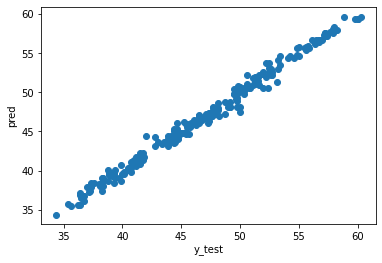

In [60]:
# Regression plot of predicted(pred) vs actual(y_test) values
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

###Predict the target values for the futureSample datas

In [61]:
# Create a list variable to hold the values predicted by the model using the futureSample_data
solution_validate = model.predict(futureSample_data)

In [62]:
#Print futureSample_Data
print(futureSample_data)

     company1  company2  company3  company4  company5  company6  company7  \
545    42.578     37.25    13.875    39.375    54.500    16.125    61.250   
29     21.063     52.50    19.125    47.250    62.250    29.875    68.875   
55     21.563     58.50    23.875    47.875    63.625    31.625    69.125   
630    58.500     32.00    19.000    42.875    36.500    18.500    62.375   

     company8  company9  
545    21.625     49.50  
29     18.125     47.25  
55     21.500     51.00  
630    27.375     46.50  


In [63]:
#Print actual futureSample_label values
print(futureSample_label)

545    51.125
29     37.375
55     41.875
630    57.250
Name: company10, dtype: float64


In [64]:
#Print predicted values
print(solution_validate)

[51.875      38.41666667 41.70833333 57.625     ]


In [65]:
# Show contrast between actual and predicted values in the future dataset
for i in range (4):
    print("The future data is {}, the predicted value is {} and the acutal value is {}".format(futureSample_data.values[i],solution_validate[i],futureSample_label.values[i]))

The future data is [42.578 37.25  13.875 39.375 54.5   16.125 61.25  21.625 49.5  ], the predicted value is 51.875 and the acutal value is 51.125
The future data is [21.063 52.5   19.125 47.25  62.25  29.875 68.875 18.125 47.25 ], the predicted value is 38.416666666666664 and the acutal value is 37.375
The future data is [21.563 58.5   23.875 47.875 63.625 31.625 69.125 21.5   51.   ], the predicted value is 41.708333333333336 and the acutal value is 41.875
The future data is [58.5   32.    19.    42.875 36.5   18.5   62.375 27.375 46.5  ], the predicted value is 57.625 and the acutal value is 57.25


### Plot graphs for better understanding of the relationships between the stock prices of company10 and other companies.

Plot graphs using the training dataset

Text(0, 0.5, 'company10')

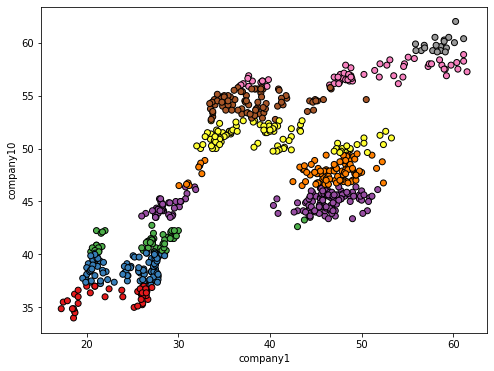

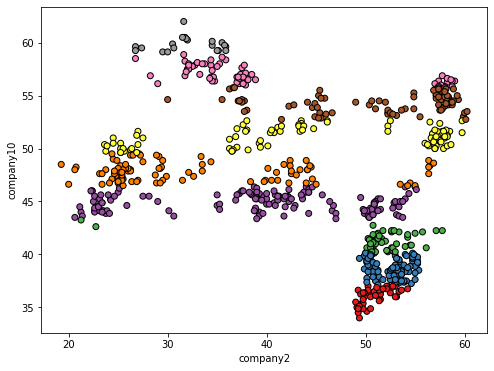

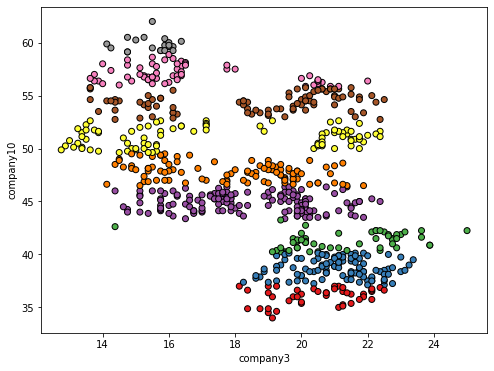

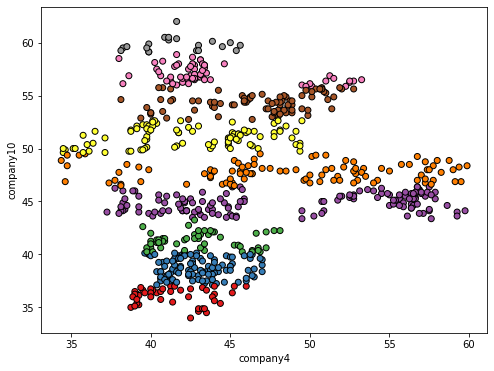

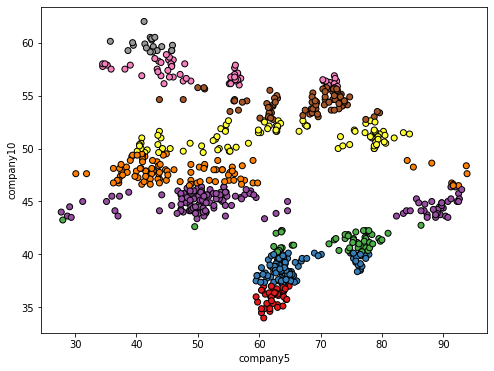

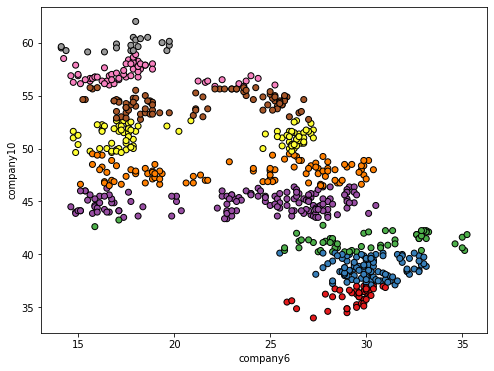

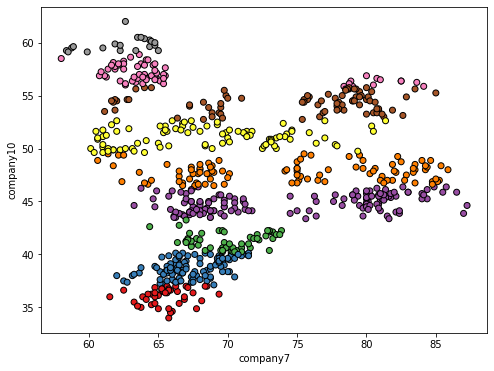

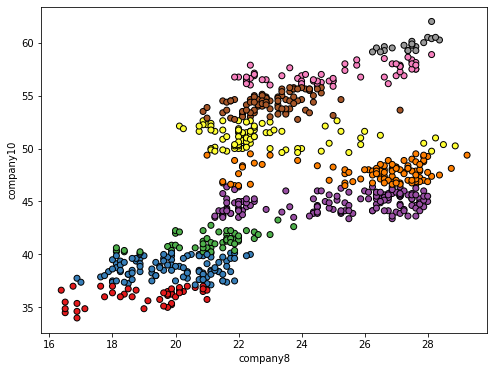

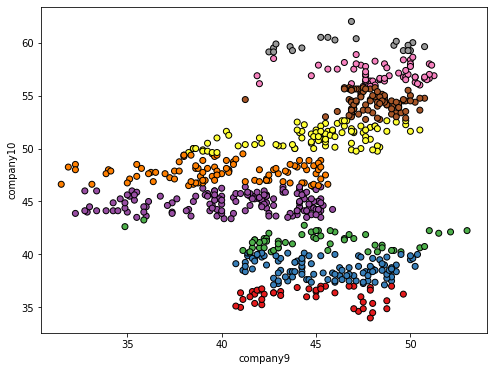

In [66]:
# plot the samples in the training dataset (companyN-company10), where N is the company number from 1-9 

X = []
for p in train_data.values:
    X.append(p[0])
Y = train_label

plt.figure(1, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company1")
plt.ylabel("company10")

# plot fig2
X = []
for p in train_data.values:
    X.append(p[1])
Y= train_label

plt.figure(2, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company2")
plt.ylabel("company10")

# plot fig3 
X = []
for p in train_data.values:
    X.append(p[2])
Y= train_label

plt.figure(3, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company3")
plt.ylabel("company10")

# plot fig4
X = []
for p in train_data.values:
    X.append(p[3])
Y= train_label

plt.figure(4, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company4")
plt.ylabel("company10")

# plot fig5
X = []
for p in train_data.values:
    X.append(p[4])
Y= train_label

plt.figure(5, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company5")
plt.ylabel("company10")

# plot fig6 
X = []
for p in train_data.values:
    X.append(p[5])
Y= train_label

plt.figure(6, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company6")
plt.ylabel("company10")

# plot fig7
X = []
for p in train_data.values:
    X.append(p[6])
Y= train_label

plt.figure(7, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company7")
plt.ylabel("company10")

# plot fig8
X = []
for p in train_data.values:
    X.append(p[7])
Y= train_label

plt.figure(8, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company8")
plt.ylabel("company10")

# plot fig9 
X = []
for p in train_data.values:
    X.append(p[8])
Y= train_label

plt.figure(9, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company9")
plt.ylabel("company10")


Plot graphs using the test dataset

Text(0, 0.5, 'company10')

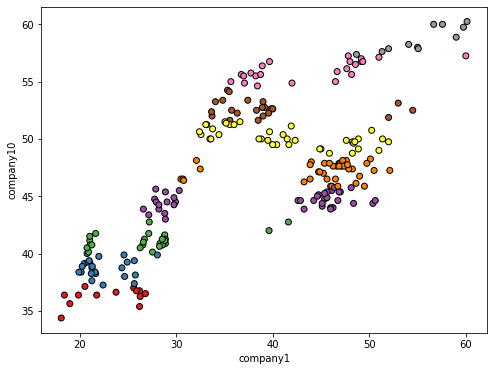

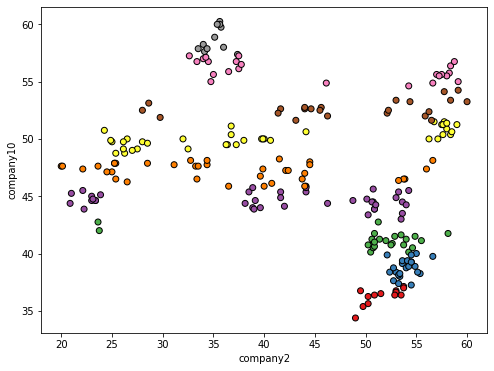

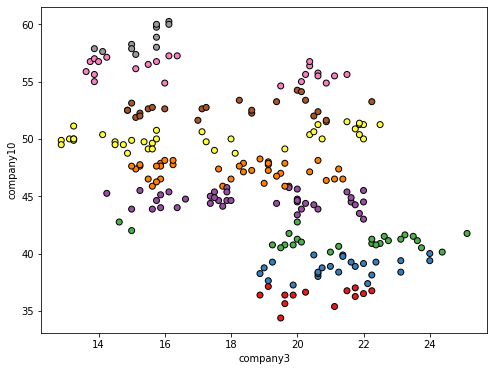

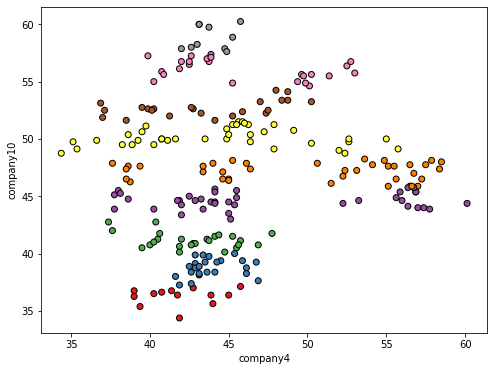

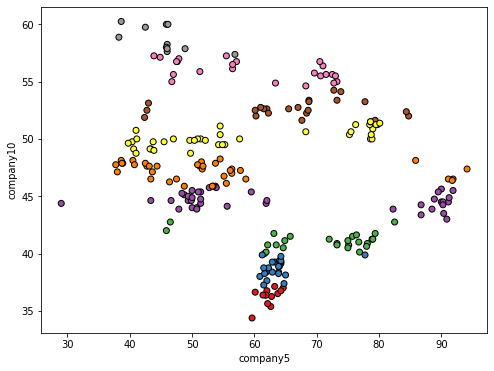

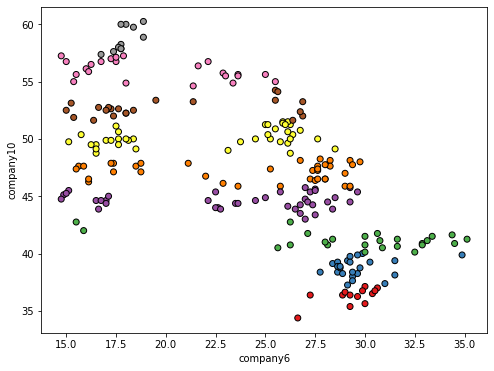

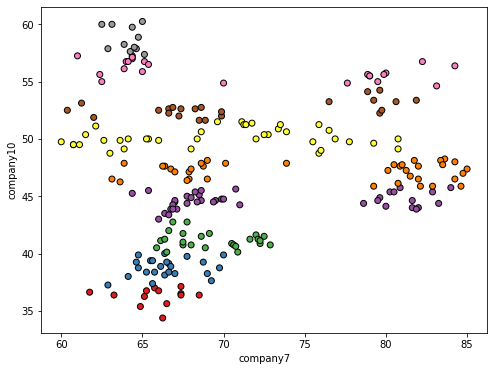

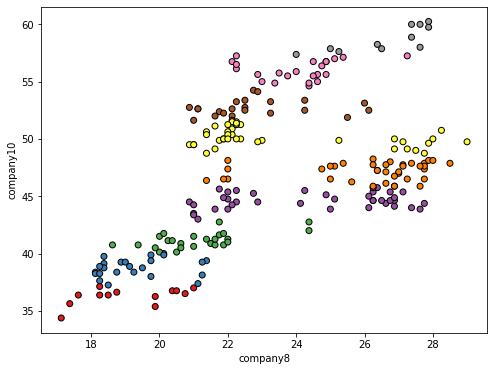

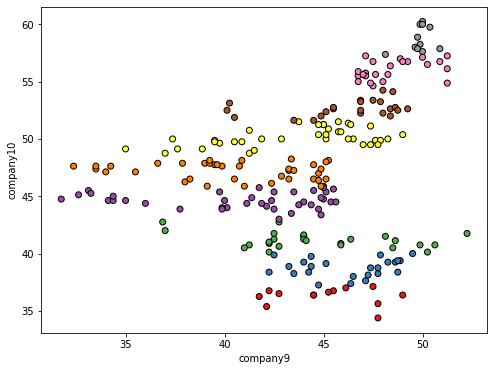

In [67]:
# plot the samples in the test dataset (companyN-company10), where N is the company number from 1-9  

X = []
for p in data_test.values:
    X.append(p[0])
Y = label_test

plt.figure(1, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company1")
plt.ylabel("company10")

# plot fig2
X = []
for p in data_test.values:
    X.append(p[1])
Y= label_test

plt.figure(2, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company2")
plt.ylabel("company10")

# plot fig3 
X = []
for p in data_test.values:
    X.append(p[2])
Y= label_test

plt.figure(3, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company3")
plt.ylabel("company10")

# plot fig4 
X = []
for p in data_test.values:
    X.append(p[3])
Y= label_test

plt.figure(4, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company4")
plt.ylabel("company10")

# plot fig5
X = []
for p in data_test.values:
    X.append(p[4])
Y= label_test

plt.figure(5, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company5")
plt.ylabel("company10")

# plot fig6 
X = []
for p in data_test.values:
    X.append(p[5])
Y= label_test

plt.figure(6, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company6")
plt.ylabel("company10")

# plot fig7 
X = []
for p in data_test.values:
    X.append(p[6])
Y= label_test

plt.figure(7, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company7")
plt.ylabel("company10")

# plot fig8 
X = []
for p in data_test.values:
    X.append(p[7])
Y= label_test

plt.figure(8, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company8")
plt.ylabel("company10")

# plot fig9 
X = []
for p in data_test.values:
    X.append(p[8])
Y= label_test

plt.figure(9, figsize=(8, 6))
plt.clf()  # clean all possible figures
plt.scatter(X, Y, c=Y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("company9")
plt.ylabel("company10")